# BODY PERFORMANCE

##### About dataset

This is data that confirmed the grade of performance with age and some exercise performance data.

#### columns

age : 20 ~64
gender : F,M
height_cm : (If you want to convert to feet, divide by 30.48)
weight_kg
body fat_%
diastolic : diastolic blood pressure (min)
systolic : systolic blood pressure (min)
gripForce
sit and bend forward_cm
sit-ups counts
broad jump_cm
class : A,B,C,D ( A: best) / stratified

### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import label_binarize, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from itertools import cycle

### loading dataset

In [2]:
df=pd.read_csv('./bodyPerformance.csv')

In [3]:
df.sample(10)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
3437,39.0,M,177.7,81.8,20.10,86.0,151.0,40.6,9.0,50.0,184.0,C
5685,60.0,F,157.4,63.5,31.70,76.0,117.0,24.1,17.3,16.0,124.0,B
3593,44.0,M,176.0,76.4,11.70,95.0,120.0,51.9,23.7,57.0,249.0,A
9048,23.0,F,159.9,47.8,23.00,73.0,132.0,25.8,20.8,31.0,176.0,B
12533,46.0,F,166.4,67.2,26.80,64.0,107.0,24.4,8.3,32.0,162.0,D
5647,25.0,M,175.3,63.4,13.90,69.0,106.0,41.7,11.0,48.0,220.0,B
5151,22.0,M,176.8,73.4,22.10,85.0,142.0,38.7,0.1,27.0,168.0,D
5893,40.0,M,168.0,69.0,11.00,83.0,134.0,45.6,18.6,61.0,254.0,B
5452,46.0,M,176.1,69.7,11.60,82.0,153.0,54.4,16.6,59.0,236.0,B
10760,38.0,M,176.4,73.9,17.54,96.0,144.0,49.3,7.2,47.0,212.0,C


In [4]:
df.shape

(13393, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,13393.0,36.775106,13.625639,21.0,25.0,32.0,48.0,64.0
height_cm,13393.0,168.559807,8.426583,125.0,162.4,169.2,174.8,193.8
weight_kg,13393.0,67.447316,11.949666,26.3,58.2,67.4,75.3,138.1
body fat_%,13393.0,23.240165,7.256844,3.0,18.0,22.8,28.0,78.4
diastolic,13393.0,78.796842,10.742033,0.0,71.0,79.0,86.0,156.2
systolic,13393.0,130.234817,14.713954,0.0,120.0,130.0,141.0,201.0
gripForce,13393.0,36.963877,10.624864,0.0,27.5,37.9,45.2,70.5
sit and bend forward_cm,13393.0,15.209268,8.456677,-25.0,10.9,16.2,20.7,213.0
sit-ups counts,13393.0,39.771224,14.276698,0.0,30.0,41.0,50.0,80.0
broad jump_cm,13393.0,190.129627,39.868000,0.0,162.0,193.0,221.0,303.0


### finding duplicates

In [7]:
df.duplicated().mean()*100

0.007466587023071754

#### dropping duplicates

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().mean()*100

0.0

### univariate analysis

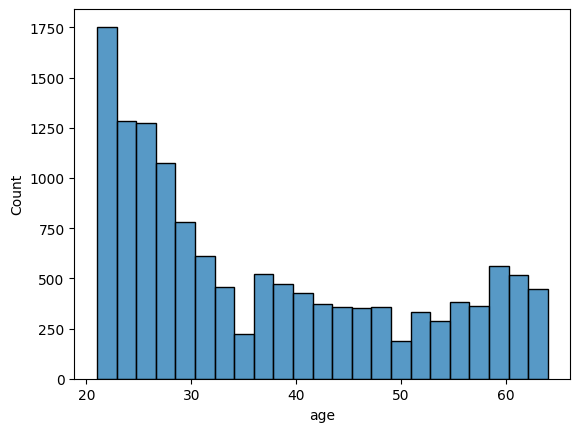

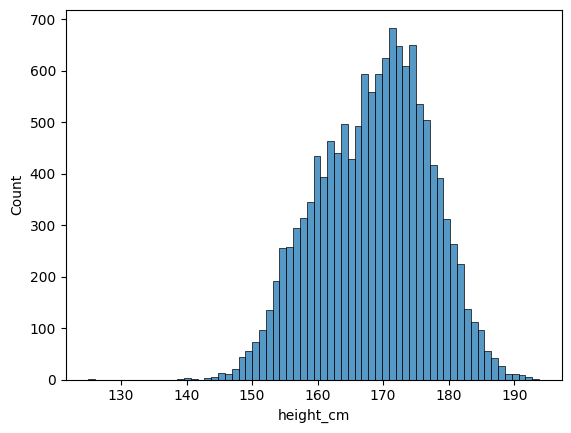

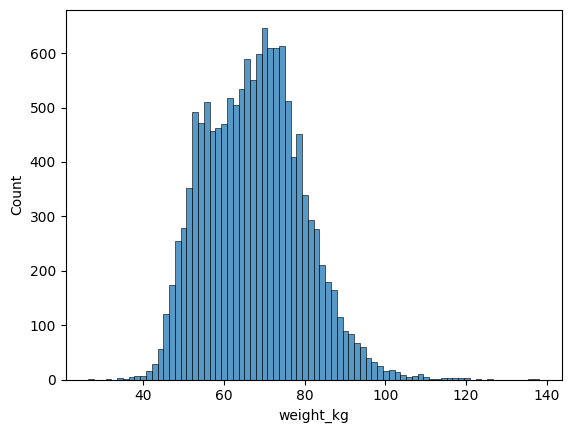

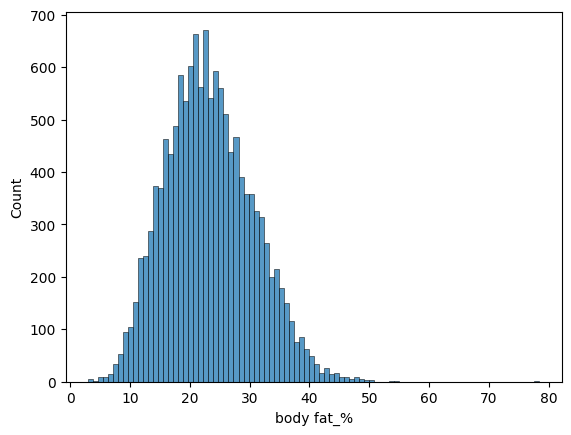

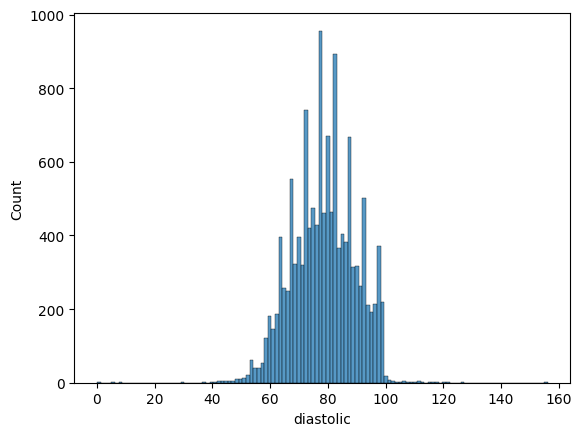

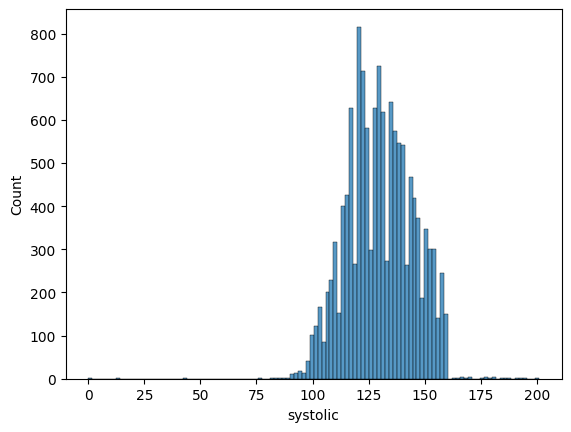

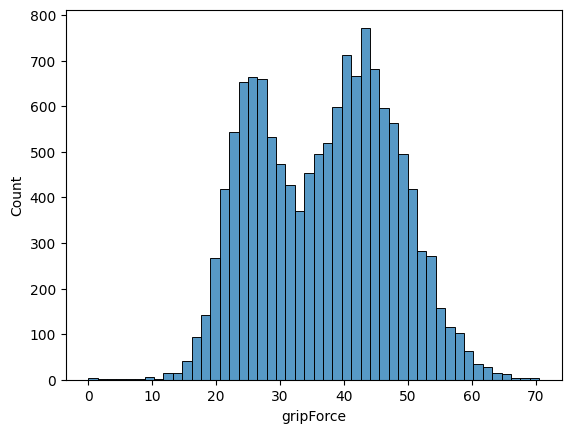

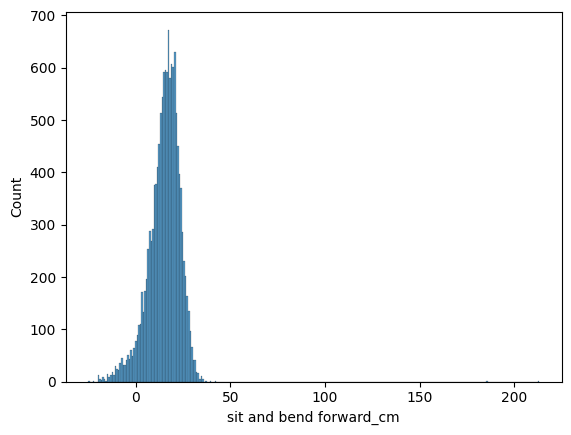

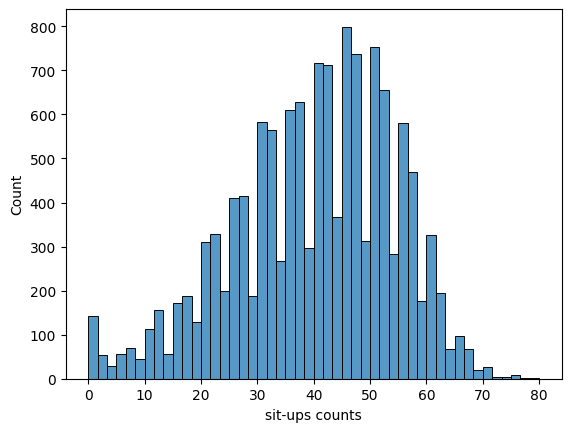

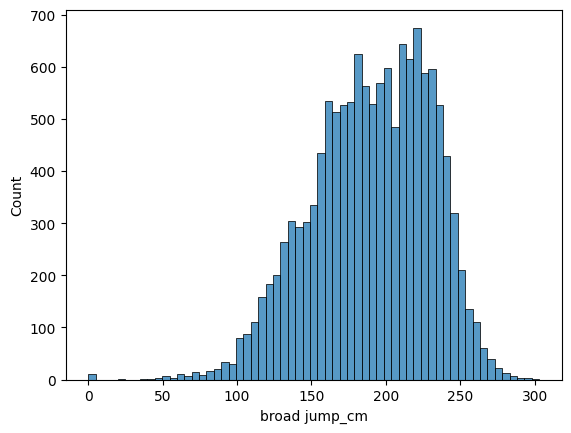

In [10]:
for i in df.columns:
    if df[i].dtypes !="object":
        sns.histplot(x = df[i])
        plt.show()

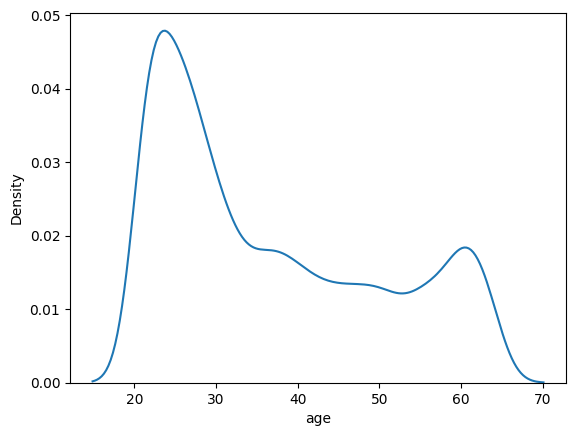

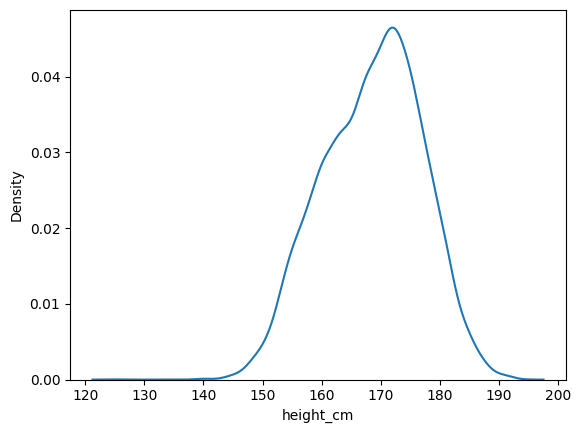

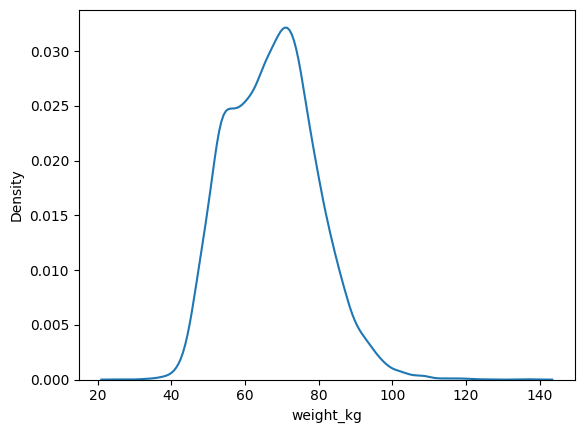

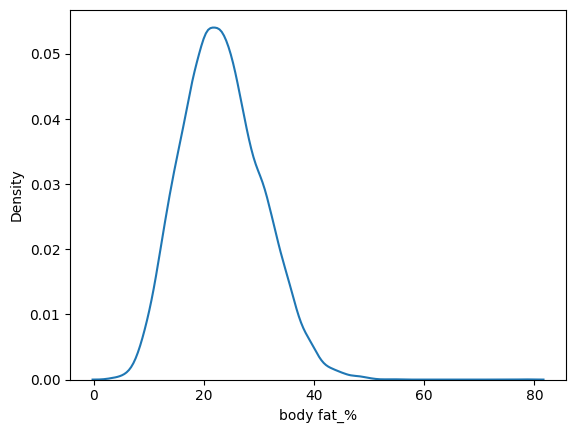

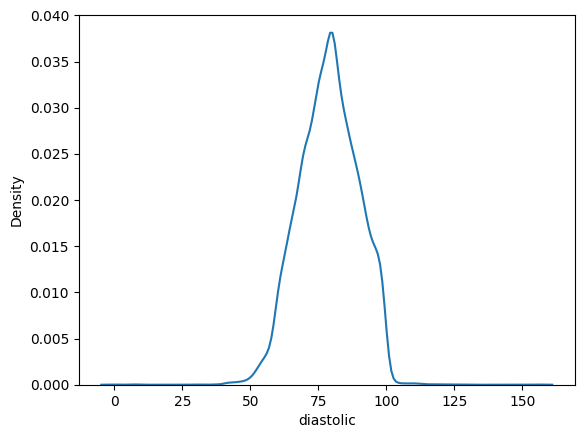

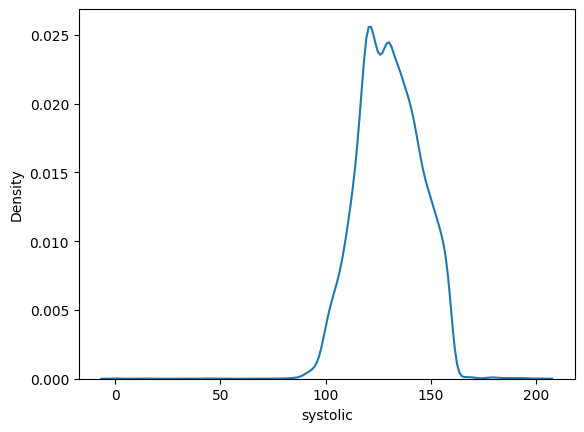

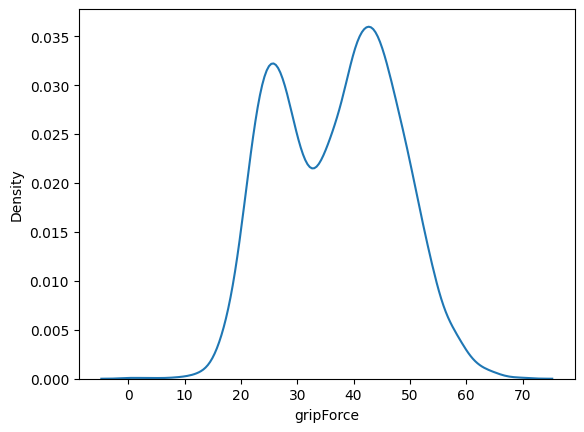

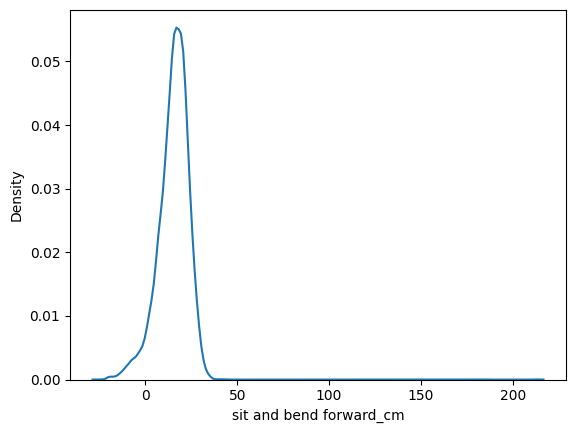

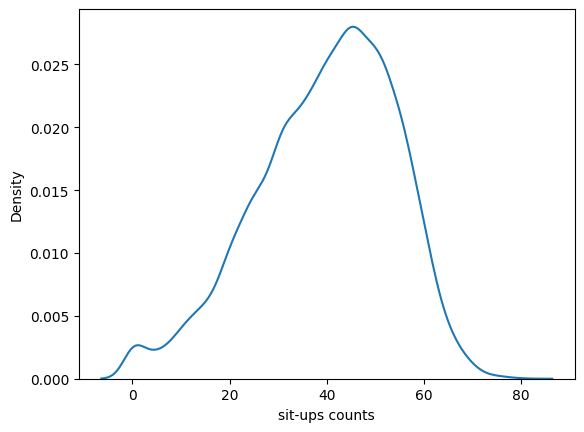

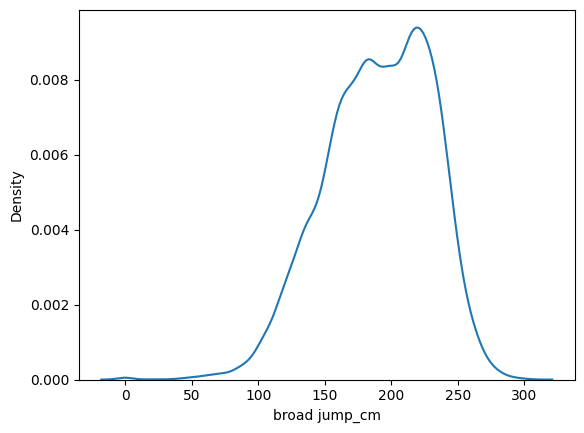

In [11]:
for i in df.columns:
    if df[i].dtypes !="object":
        sns.kdeplot(x= df[i])
        plt.show()

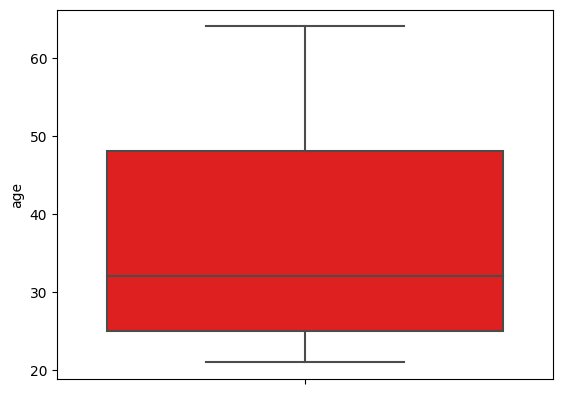

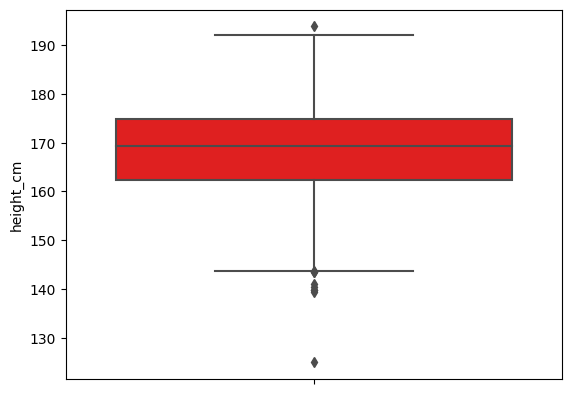

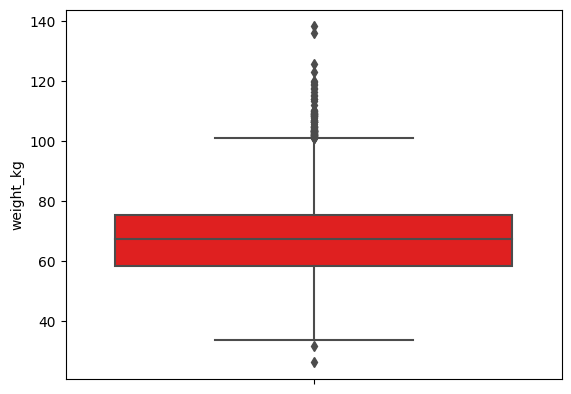

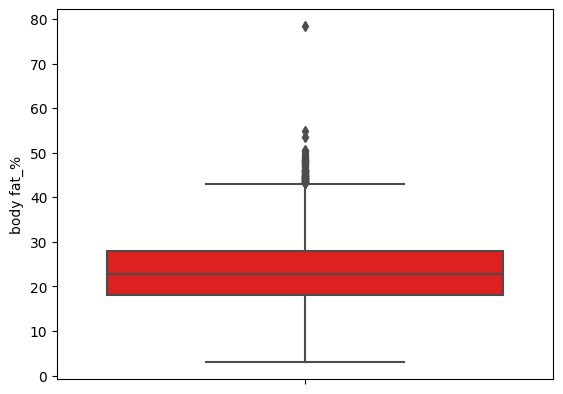

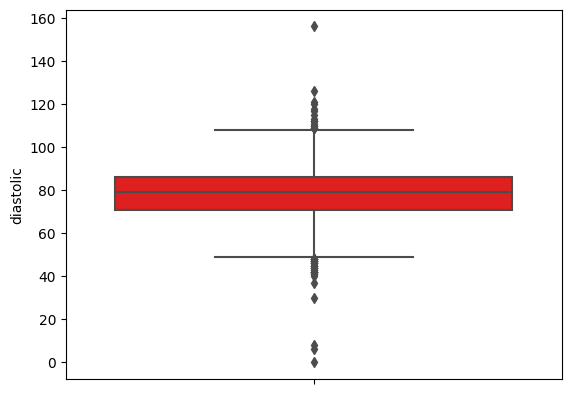

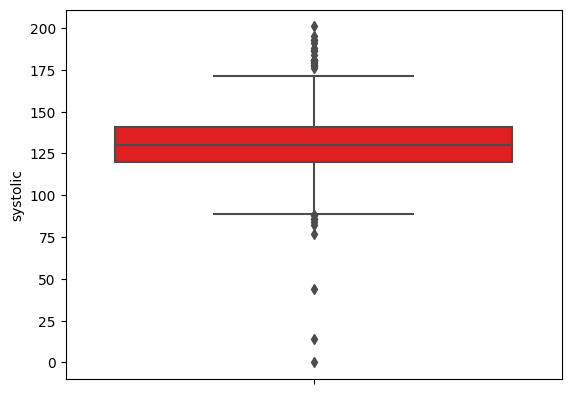

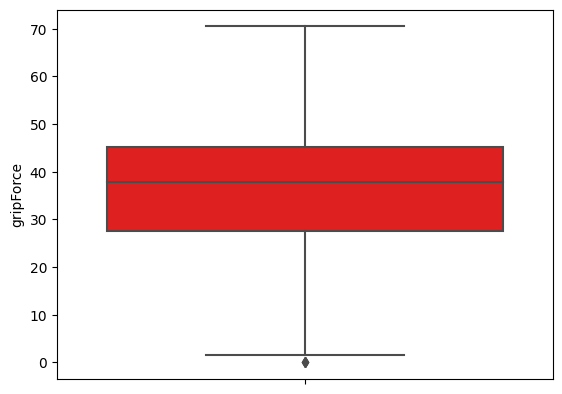

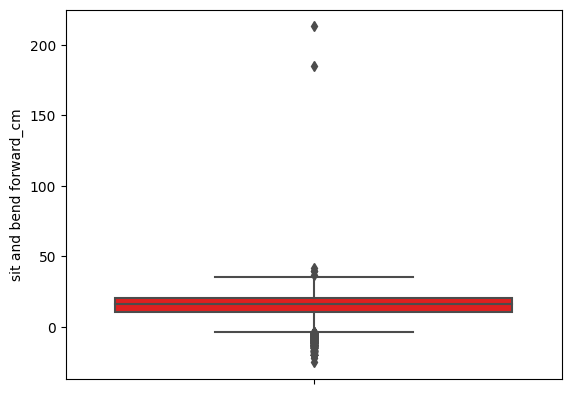

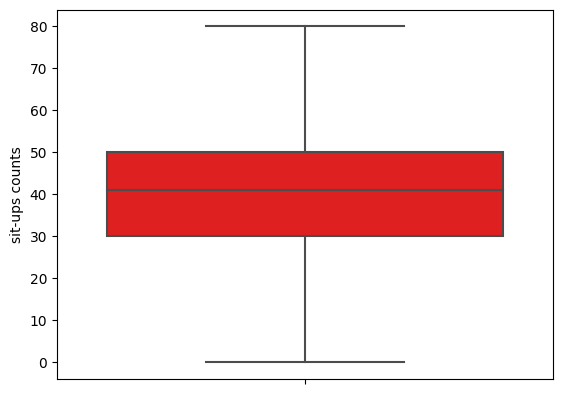

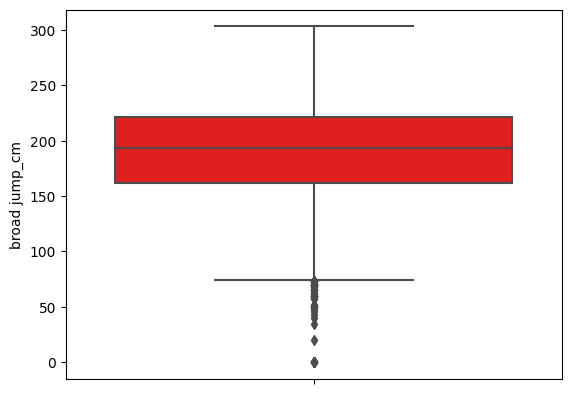

In [12]:
for i in df.columns:
    if df[i].dtype!="object":
        sns.boxplot(y=df[i],color="red")
        plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13392 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13392 non-null  float64
 1   gender                   13392 non-null  object 
 2   height_cm                13392 non-null  float64
 3   weight_kg                13392 non-null  float64
 4   body fat_%               13392 non-null  float64
 5   diastolic                13392 non-null  float64
 6   systolic                 13392 non-null  float64
 7   gripForce                13392 non-null  float64
 8   sit and bend forward_cm  13392 non-null  float64
 9   sit-ups counts           13392 non-null  float64
 10  broad jump_cm            13392 non-null  float64
 11  class                    13392 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.3+ MB


### PIE CHART

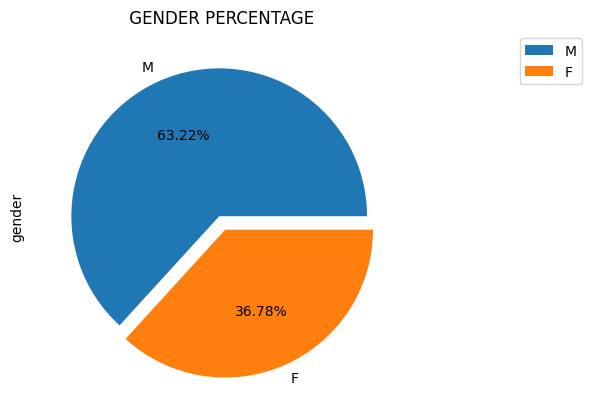

In [14]:
#This type of chart is a circle divided in to a series of segments/percentage distribution
myexplode=[0,0.1]
x=df.gender.value_counts().plot.pie(autopct="%1.2f%%",explode=myexplode);
plt.legend(bbox_to_anchor=(1.5,1))
plt.title(" GENDER PERCENTAGE")
plt.show();

### Multivariate Analysis

#### LINE PLOT

Text(0.5, 1.0, ' AGE VS BODY FAT ')

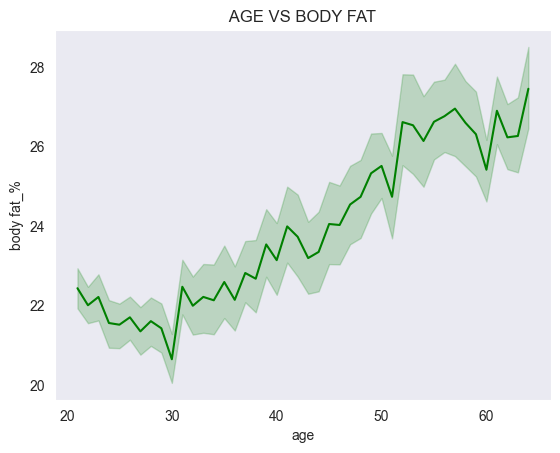

In [15]:
sns.set_style('dark')
sns.lineplot(x='age',y='body fat_%',data=df.sort_values(by='age'),color='green');
plt.title(" AGE VS BODY FAT ")

### Bar plot

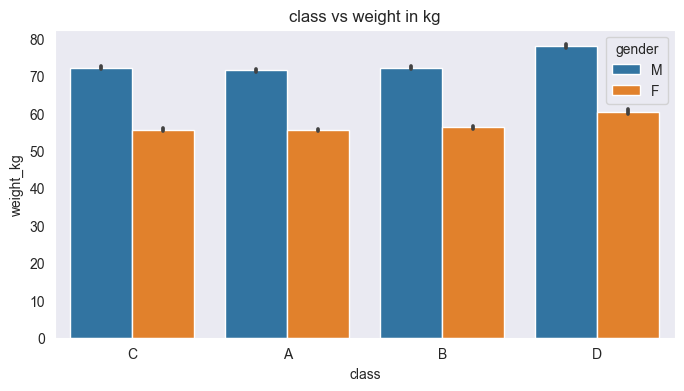

In [16]:
plt.figure(figsize=(8,4))
plt.title('class vs weight in kg')
sns.barplot(x='class', y='weight_kg',hue='gender',data=df);

In [17]:
df.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class'],
      dtype='object')

### PAIR PLOT

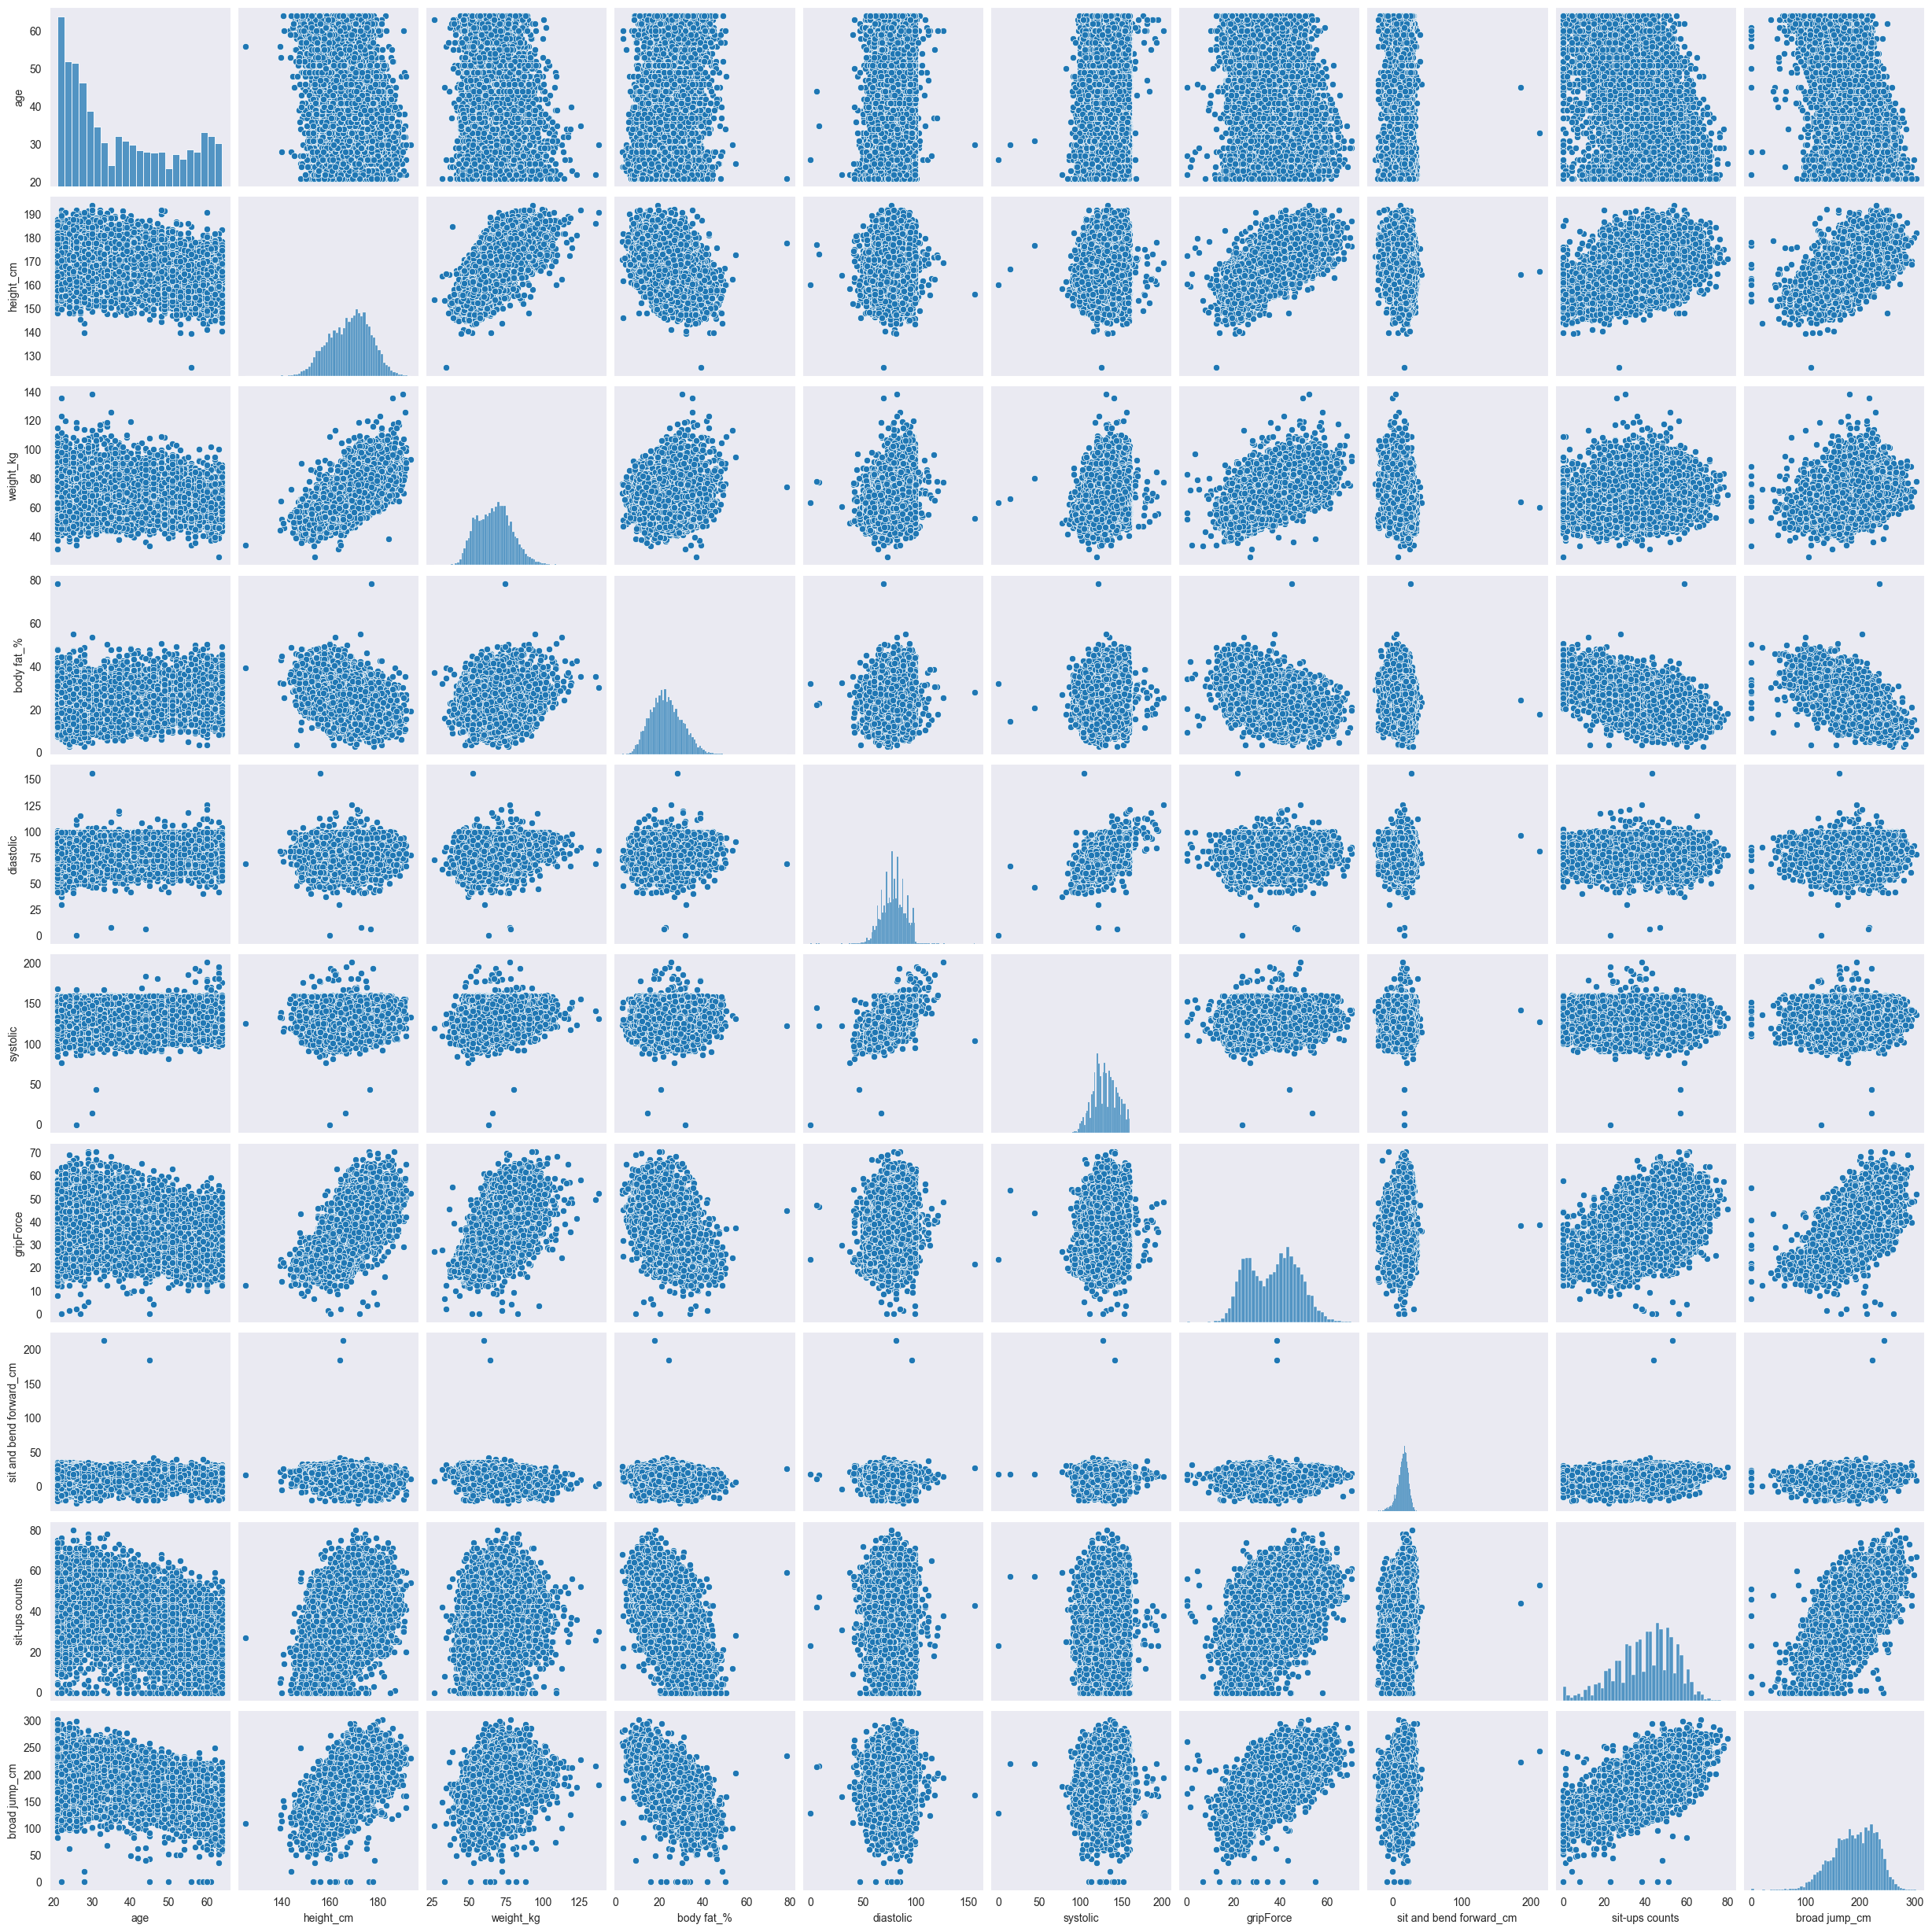

In [18]:
#A pairwise relationships between different  variables in a dataset
sns.pairplot(df, kind='scatter'); 

#### Label encoding the categorical columns

In [19]:
cols=['gender','class']
le=LabelEncoder()
df[cols]=df[cols].apply(le.fit_transform)

In [20]:
x=df.iloc[:,:-1].values

In [21]:
y=df.iloc[:,-1].values

#### Feature Scaling

In [22]:
le=StandardScaler()

In [23]:
x=le.fit_transform(x)

In [24]:
model = RandomForestClassifier()

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [26]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with RandomForestClassifier()
Model accuracy on train is::  1.0
Model accuracy on test is::  0.7342291899962673
confusion_matrix train is::  [[2673    0    0    0]
 [   0 2668    0    0]
 [   0    0 2692    0]
 [   0    0    0 2680]]
confusion_matrix test is::  [[574  89   9   2]
 [155 401  95  28]
 [ 52 121 452  32]
 [  9  42  78 540]]
Wrong Predictions made: 712 / 2679
************************************************************


In [27]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)

In [28]:
OUTPUT

,ACTUAL,PREDICTION
0,2,2
1,0,0
2,2,2
3,1,1
4,1,1
...,...,...
13387,2,2
13388,3,3
13389,0,0
13390,3,3


#### Confusion matrix 

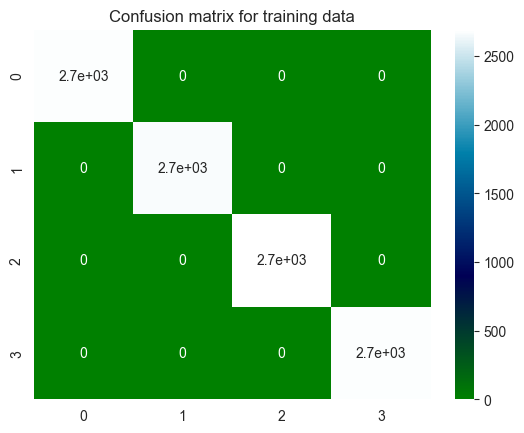

In [29]:
plt.title("Confusion matrix for training data")
sns.heatmap(con_train, annot=True, cmap='ocean');

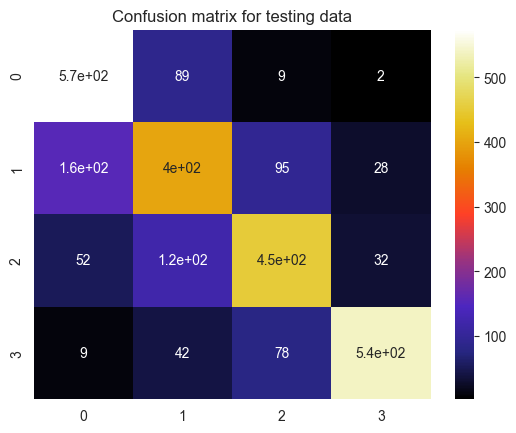

In [30]:
plt.title("Confusion matrix for testing data")
sns.heatmap(con_test, annot=True, cmap='CMRmap');

# ROC AUC CURVE

### For plotting ROC AUC curve for each class, we need to label-binarize the Target y

In [31]:
y = df.iloc[:,-1].values

In [32]:
y = label_binarize(y, classes=[0,1,2,3])
n_classes = 4

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

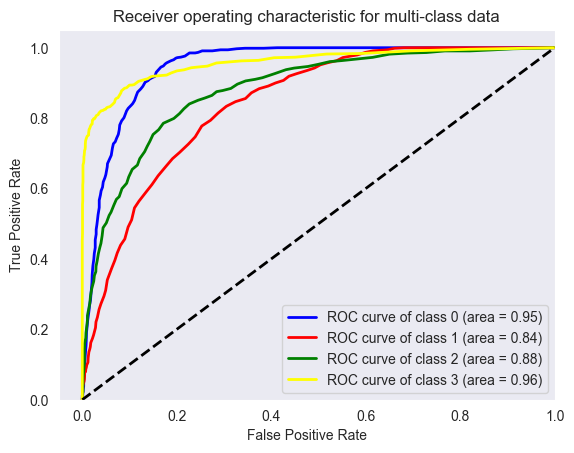

In [33]:
classifier = OneVsRestClassifier(RandomForestClassifier(random_state=0),)
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'yellow', 'orange', 'pink'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()